In [25]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random

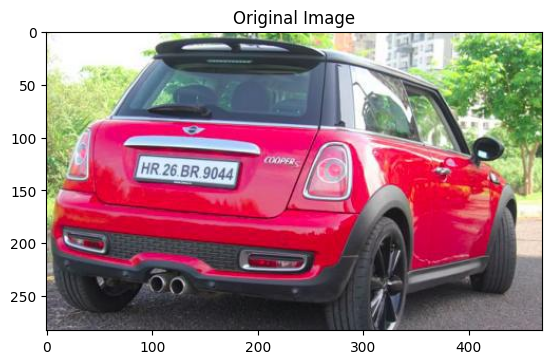

Text(0.5, 1.0, 'Processed Image')

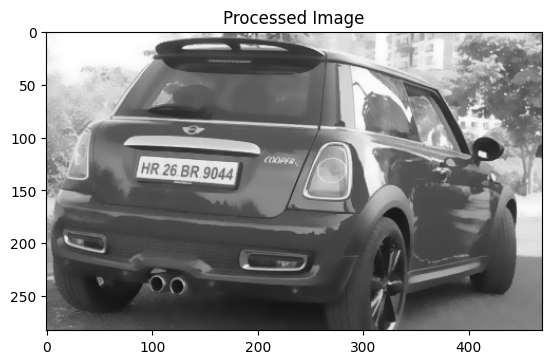

In [26]:
img = cv2.imread(
    "/Users/adityaparikh/Developer/Personal/car-damage-detectron/dataset1/number plates/4.jpg")  # read image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert image to gray
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  # Noise reduction
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))  # show processed image
plt.title('Processed Image')

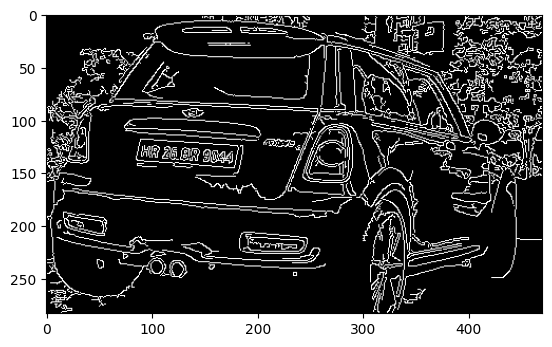

In [27]:
edged = cv2.Canny(bfilter, 30, 200)  # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [28]:
keypoints = cv2.findContours(
    edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # Find contours
contours = imutils.grab_contours(keypoints)  # Grab contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[
    :10]  # Sort contours

In [29]:
# Loop over our contours to find the best possible approximate contour of 10 contours
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

print("Location: ", location)

Location:  [[[ 85 137]]

 [[178 145]]

 [[182 126]]

 [[ 89 118]]]


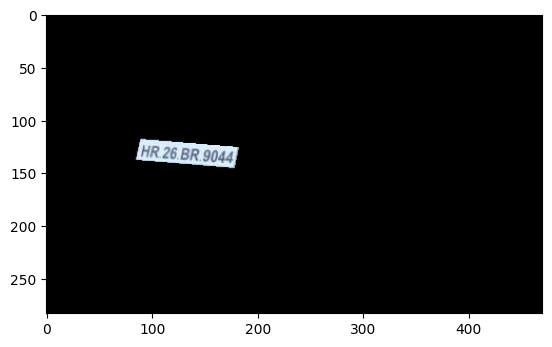

In [30]:
# create blank image with same dimensions as the original image
mask = np.zeros(gray.shape, np.uint8)
# Draw contours on the mask image
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
# Take bitwise AND between the original image and mask image
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))  # show the final image

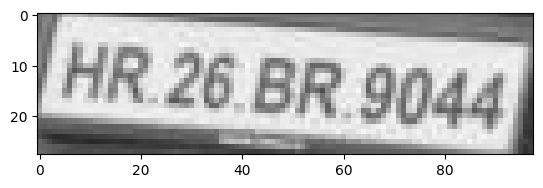

In [31]:
# Find the co-ordinates of the four corners of the document
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))  # Find the top left corner
(x2, y2) = (np.max(x), np.max(y))  # Find the bottom right corner
cropped_image = gray[x1:x2+1, y1:y2+1]  # Crop the image using the co-ordinates

# show the cropped image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [32]:
# create an easyocr reader object with english as the language
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)  # read text from the cropped image
result

[([[0, 0], [np.int32(98), 0], [np.int32(98), np.int32(28)], [0, np.int32(28)]],
  'HR.26 BR 9044',
  np.float64(0.7786744307425273))]

HR.26 BR 9044


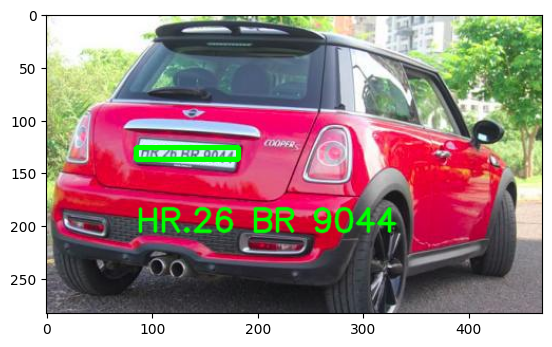

In [33]:
text = result[0][-2]  # Extract the text from the result
font = cv2.FONT_HERSHEY_SIMPLEX  # Font style
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(
    0, 255, 0), thickness=2, lineType=cv2.LINE_AA)  # put the text on the image
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(
    approx[2][0]), (0, 255, 0), 3)  # Draw a rectangle around the text

# show the final image with text
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
print(text)